In [59]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [60]:
df_crop = pd.read_csv('crop_production.csv')
df_crop_rec = pd.read_csv('Crop_recommendation.csv')

In [61]:
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# EDA

In [62]:
df_crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [63]:
df_crop_rec.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [64]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [65]:
df_crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [66]:
df_crop.dropna(inplace=True)

In [67]:
print("Number of unique states: ",df_crop['State_Name'].unique().__len__())
print("Number of unique crops: ",df_crop['Crop'].unique().__len__())

Number of unique states:  33
Number of unique crops:  124


In [68]:
print(df_crop['Crop'].value_counts())

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64


In [69]:
print(df_crop['State_Name'].value_counts())

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

Production, Area, Production/Area (Yield) of each state

In [70]:
states = df_crop['State_Name'].unique()

dict_states = {}
ptr = -1
for i in states:
    dict_states[i]=ptr+1
    ptr+=1

area_for_state = np.zeros(len(states))
production_for_state = np.zeros(len(states))
production_by_area = np.zeros(len(states))

for i in range(len(df_crop)):
    try:
        if(df_crop['Area'][i]):
            area_for_state[dict_states[df_crop['State_Name'][i]]]+=df_crop['Area'][i]
        if(df_crop['Production'][i]):
            production_for_state[dict_states[df_crop['State_Name'][i]]]+=df_crop['Production'][i]
    except:
        continue

for i in range(len(states)):
    production_by_area[i]=production_for_state[i]/area_for_state[i]

In [71]:
# sum = 0
# for i in range(len(df_crop)):
#     try:
#         if(df_crop['State_Name'][i]=='Kerala'):
#             sum+=df_crop['Production'][i]
#         if(df_crop['Area'][i]):
#             area_for_state[dict_states[df_crop['State_Name'][i]]]+=df_crop['Area'][i]
#         if(df_crop['Production'][i]):
#             production_for_state[dict_states[df_crop['State_Name'][i]]]+=df_crop['Production'][i]
#     except:
#         continue

# print(sum)

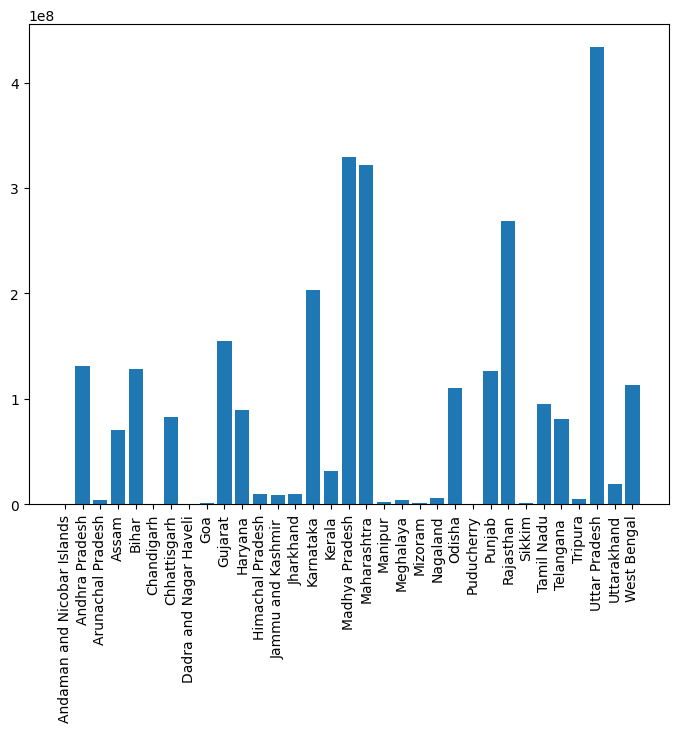

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(states,area_for_state)
plt.xticks(rotation =90)
plt.show()

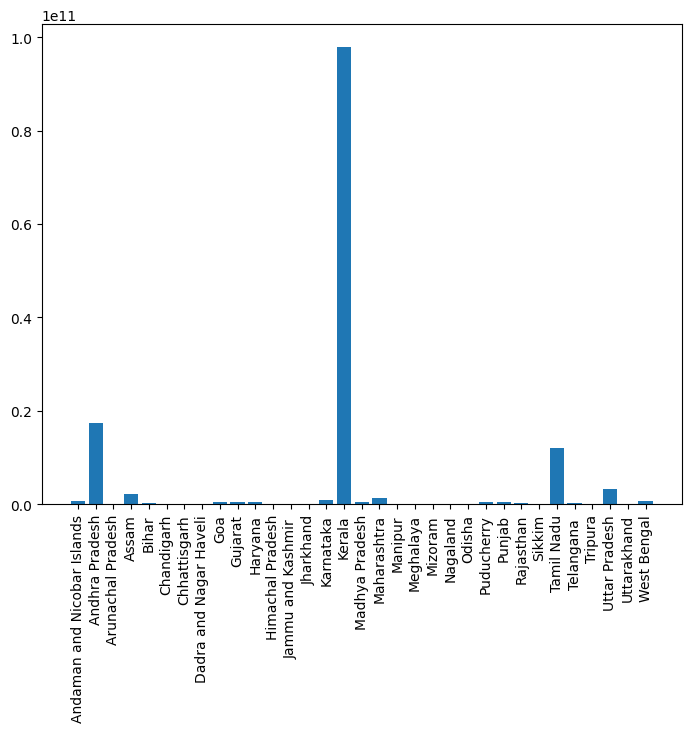

In [73]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(states,production_for_state)
plt.xticks(rotation =90)
plt.show()

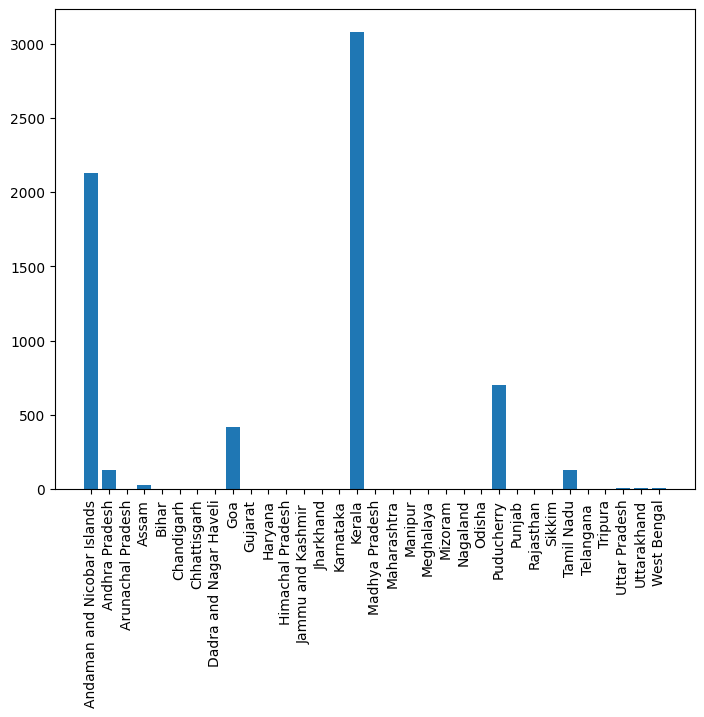

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(states,production_by_area)
plt.xticks(rotation =90)
plt.show()

In [75]:
print(df_crop['District_Name'].value_counts())

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64


In [76]:
df_crop['Yield'] = (df_crop['Production'] / df_crop['Area'])
df_crop.head() 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


In [77]:
df_crop['Yield'].describe()

count    242361.000000
mean         41.649059
std         817.572839
min           0.000000
25%           0.513514
50%           1.000000
75%           2.355450
max       88000.000000
Name: Yield, dtype: float64

### Remove outliers

In [78]:
Q1 = df_crop['Yield'].quantile(0.25)
Q3 = df_crop['Yield'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_crop['Yield'] >= Q1 - 1.5 * IQR) & (df_crop['Yield'] <= Q3 + 1.5 *IQR)
df_crop = df_crop.loc[filter]

In [79]:
df_crop['Yield'].describe()

count    205738.000000
mean          1.142188
std           0.985188
min           0.000000
25%           0.469194
50%           0.837607
75%           1.500000
max           5.118052
Name: Yield, dtype: float64

In [80]:
df_crop.corr()

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.025612,0.003884,0.079409
Area,-0.025612,1.000000,0.768689,0.126882
Production,0.003884,0.768689,1.000000,0.322713
Yield,0.079409,0.126882,0.322713,1.000000


### Merging datasets

In [81]:
def fun(i):

    m = np.mean(i)             # Mean
    d = np.std(i)              # Standard Deviation
    min_value = np.percentile(i,10)    # Minimum value
    max_value = np.percentile(i,90)     # Maximum value
    size = len(df_crop)     # Number of elements in the column

    arr = np.random.normal(loc=m, scale=d, size=size)

    mean_arr = np.mean(arr)
    std_arr = np.std(arr)

    arr = ((arr - mean_arr) * (d / std_arr)) + m
    arr = np.clip(arr, min_value, max_value)

    return arr

df_crop['N'] = fun(df_crop_rec['N'])
df_crop['P'] = fun(df_crop_rec['P'])
df_crop['K'] = fun(df_crop_rec['K'])
df_crop['ph'] = fun(df_crop_rec['ph'])
df_crop['temperature'] = fun(df_crop_rec['temperature'])
df_crop['rainfall'] = fun(df_crop_rec['rainfall'])
df_crop['humidity'] = fun(df_crop_rec['humidity'])

In [82]:
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,N,P,K,ph,temperature,rainfall,humidity
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,69.945546,59.542113,16.000000,7.155423,22.671343,96.391339,82.291133
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000,35.237290,24.747581,83.100000,6.622532,19.250363,97.850541,60.339232
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,32.989804,84.916481,83.100000,6.448884,23.829971,116.466467,93.065588
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,8.000000,39.944405,57.325269,5.888441,29.255993,55.427270,36.663404
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,38.614831,89.100000,32.322849,5.626977,31.330131,116.404430,80.826748


### ONE HOT ENCODING

We need to one hot encode the columns which are non-numeric

In [83]:
modified_df_crop = pd.get_dummies(df_crop)

In [84]:
modified_df_crop

,Crop_Year,Area,Production,Yield,N,P,K,ph,temperature,rainfall,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,69.945546,59.542113,16.000000,7.155423,22.671343,96.391339,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0.500000,35.237290,24.747581,83.100000,6.622532,19.250363,97.850541,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,3.147059,32.989804,84.916481,83.100000,6.448884,23.829971,116.466467,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,3.642045,8.000000,39.944405,57.325269,5.888441,29.255993,55.427270,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0.229167,38.614831,89.100000,32.322849,5.626977,31.330131,116.404430,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246084,2014,1622.0,3663.0,2.258323,52.678628,89.100000,83.100000,6.536924,21.408607,166.374882,...,0,0,0,0,0,1,0,0,0,0
246086,2014,306.0,801.0,2.617647,8.000000,54.744642,16.000000,7.425390,30.212008,151.488432,...,0,0,0,0,0,0,0,0,0,0
246087,2014,627.0,463.0,0.738437,61.588970,70.914997,83.100000,5.917908,20.256108,142.909550,...,0,0,0,0,0,0,0,0,0,0
246089,2014,279151.0,597899.0,2.141848,9.247332,47.043255,34.978484,6.161478,24.825266,98.194657,...,0,0,0,0,0,0,0,0,0,0


### Train-Test split

Splitting the dataset for training and testing

In [85]:
X = modified_df_crop.drop(['Production','Yield'],axis=1)
Y = modified_df_crop['Production']

train_x, test_x, train_y, test_y = train_test_split(X,Y,train_size=0.7)

# MODELS

### Linear Regression

In [86]:
model = LinearRegression()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

In [87]:
print("RMS Error: ",mean_squared_error(test_pred,test_y,squared=False))
print("R2 score: ",r2_score(test_y,test_pred))

RMS Error:  52516.96626548442
R2 score:  0.6700439016076545


### Decision Tree

In [88]:
model = DecisionTreeRegressor()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

In [89]:
print("RMS Error: ",mean_squared_error(test_pred,test_y,squared=False))
print("R2 score: ",(r2_score(test_y,test_pred)))

RMS Error:  33777.985142207006
R2 score:  0.8635025998407593


### Support Vector Regression

In [90]:
# from sklearn.svm import SVR 

# model = SVR(kernel = 'rbf')
# model.fit(train_x,train_y)

# test_pred = model.predict(test_x)

In [91]:
# print("RMS Error: ",mean_squared_error(test_pred,test_y,squared=False))
# print("R2 score: ",(r2_score(test_y,test_pred)))

### Ridge Regression

In [92]:
model = Ridge()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

In [93]:
print("RMS Error: ",mean_squared_error(test_pred,test_y,squared=False))
print("R2 Score:", r2_score(test_y,test_pred))

RMS Error:  52516.1659709743
R2 Score: 0.6700539577880056


### Lasso Regression

In [94]:
model = Lasso()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

In [95]:
print("RMS Error: ",mean_squared_error(test_pred,test_y,squared=False))
print("R2 Score: ", r2_score(test_y,test_pred))

RMS Error:  52508.6112107605
R2 Score:  0.6701488803283002
